# spin transformations on discrete surfaces
Tim Tyree<br>
12.30.2022

This notebook works along with the paper of the same name by Crane, Pinkall, and Schröder (2011).

In [7]:
from lib.my_initialization import *

In [8]:
plt.plot([4]*3)
plt.close()
#reset matplotlib
import matplotlib as mpl
sns.reset_orig()
mpl.rc_file_defaults()
#set randomization seed
np.random.seed(42)
#consider darkmode
darkmode=False
if darkmode:
    # For darkmode plots
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    
%load_ext autoreload
%autoreload 2

In [9]:
import scipy.io as sio
from IPython.display import IFrame


In [10]:
import scipy

# define module

In [11]:
def get_colors_trimesh(inp, colormap=None, vmin=None, vmax=None):
    """inp is a 1D numpy array that is mapped to a plt.cm.jet if colormap is None.
    
    Example Usage:
colors = get_colors_trimesh(rho, plt.cm.jet)
mesh = trimesh.Trimesh(vertices=vert,faces=tria,face_colors=colors)
    """
    
    if colormap is None:
        colormap = plt.cm.jet
    # norm = plt.Normalize()
    # colors = plt.cm.jet(norm(rho))
    # colors = plt.cm.jet(np.linspace(0,1,len(dz)))
    norm = plt.Normalize(vmin, vmax)
    colors = colormap(norm(inp))
    return (255*colors/np.max(colors)).astype('uint8')#[:,0,:]


In [12]:
@njit
def jiH(pnt):
    """jiH castes a cartesion point, pnt, to a real quaternionic representation."""
    a=pnt[0]; b=pnt[1]; c=pnt[2]; d=pnt[3];
    h = np.array([
        [a, -b, -c, -d],
        [b,  a, -d,  c],
        [c,  d,  a, -b],
        [d, -c,  b,  a]])
    return h


# load example triangle mesh endowed with scalar curvture field

In [13]:
root_dir = '/'.join(nb_dir.split('/')[:3])
# mesh_folder = f"{root_dir}/Documents/MATLAB/spin/res"
mesh_folder = f"{root_dir}/Documents/meshes/res"
os.chdir(mesh_folder)
for fn in sorted(os.listdir()):
    pass
fn

'sphere.mat'

In [14]:
#load example mesh with custom curvature field
mat = sio.loadmat(fn)
# tria,vert,rho = mat['model'][0,0]
vert,tria,rho = mat['model'][0,0]
rho = rho.T.flatten()
np.min(tria),np.max(tria),tria.shape

(1, 4002, (3, 8000))

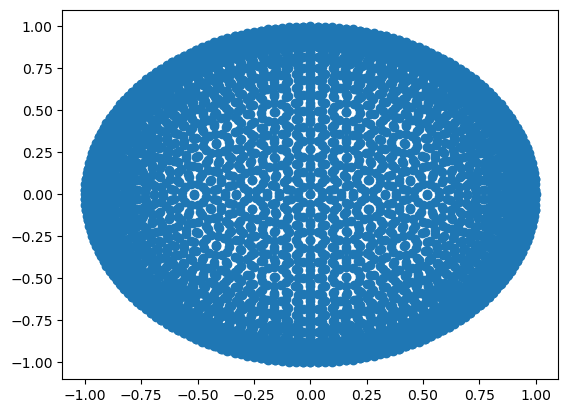

((8000, 3), (8000,), (4002, 3))

In [15]:

# vert = vert.T.copy()-1 #correct for matlab's 1 indexing
# tria = tria.T.copy()
tria = tria.T.copy()-1 #correct for matlab's 1 indexing
vert = vert.T.copy()
use_whiten_mesh=False
if use_whiten_mesh:
    #optionally whiten the mesh
    vert -= np.mean(vert,axis=0)
    vert /= np.std(vert,axis=0)
# plt.scatter(x=tria[:,0],y=tria[:,1])
plt.scatter(x=vert[:,0],y=vert[:,2])#,c=rho,cmap='jet')
plt.show()
# vert.shape,tria.shape,rho.shape,np.max(vert)
tria.shape,rho.shape,vert.shape

In [16]:
colors = get_colors_trimesh(rho, plt.cm.jet)


# # if colormap is None:
# colormap = plt.cm.jet
# norm = plt.Normalize(vmin=None, vmax=None)
# colors = colormap(norm(rho))
# # (255*colors/np.max(colors)).astype('uint8')[:,0,:]
# colors = (255*colors/np.max(colors)).astype('uint8')#[:,0:]


In [17]:
# initialize mesh colored by rho
mesh = trimesh.Trimesh(vertices=vert,faces=tria,
                       face_colors=colors,
                       face_attributes={'rho':rho})

In [18]:
# is the current mesh watertight?
print(f"{mesh.is_watertight=}")
# what's the euler number for the mesh?
print(f"{mesh.euler_number=}")
# the convex hull is another Trimesh object that is available as a property
# lets compare the volume of our mesh with the volume of its convex hull
print(f"{mesh.volume / mesh.convex_hull.volume=:.7f}")
# # since the mesh is watertight, it means there is a
# # volumetric center of mass which we can set as the origin for our mesh
print(f"{mesh.center_mass=}")
mesh.vertices -= mesh.center_mass
print(f"{mesh.center_mass=}")
# what's the moment of inertia for the mesh?
print(f"{mesh.moment_inertia=}")

# # if there are multiple bodies in the mesh we can split the mesh by
# # connected components of face adjacency
# # since this example mesh is a single watertight body we get a list of one mesh
# mesh.split()

# axis aligned bounding box is available
print(f"{mesh.bounding_box.extents=}")

mesh.is_watertight=True
mesh.euler_number=2
mesh.volume / mesh.convex_hull.volume=1.0000000
mesh.center_mass=array([ 0.00000000e+00,  3.53884582e-17, -4.42355728e-18])
mesh.center_mass=array([ 8.84711455e-18, -6.63533591e-18,  9.95300387e-18])
mesh.moment_inertia=array([[ 1.67165441e+00,  1.48029737e-17, -1.11022302e-17],
       [ 1.48029737e-17,  1.67165448e+00,  6.33706986e-08],
       [-1.11022302e-17,  6.33706986e-08,  1.67165430e+00]])
mesh.bounding_box.extents=array([2., 2., 2.])


In [19]:
# # #color vertices manually
# # for i,c in enumerate(vertex_colors):
# #     mesh.visual.vertex_colors[i]=c
# # mesh.visual.vertex_colors
# # #randomize face colors
# for face in mesh.faces:
#     mesh.visual.vertex_colors[face] = colors[face]
# for facet in mesh.facets:
#     mesh.visual.vertex_colors[facet] = trimesh.visual.random_color()
# mesh.show()

In [20]:
# #plot an image on the mesh
# m = mesh
# uv = np.random.rand(m.vertices.shape[0], 2)
# # im = np.random.rand(m.vertices.shape[0], m.vertices.shape[0])
# im = np.random.rand(200,200)
# material = trimesh.visual.texture.SimpleMaterial(image=im)
# color_visuals = trimesh.visual.TextureVisuals(uv=uv, image=im, material=material)
# mesh=trimesh.Trimesh(vertices=m.vertices, faces=m.faces, visual=color_visuals, validate=True, process=False)
# mesh.show()

In [21]:
# # transform method can be passed a (4, 4) matrix and will cleanly apply the transform
# mesh.apply_transform(trimesh.transformations.random_rotation_matrix())

# # a minimum volume oriented bounding box also available
# # primitives are subclasses of Trimesh objects which automatically generate
# # faces and vertices from data stored in the 'primitive' attribute
# print(f"{mesh.bounding_box_oriented.primitive.extents=}")
# print(f"{mesh.bounding_box_oriented.primitive.transform=}")

# # bounding spheres and bounding cylinders of meshes are also
# # available, and will be the minimum volume version of each
# # except in certain degenerate cases, where they will be no worse
# # than a least squares fit version of the primitive.
# print(f"""{mesh.bounding_box_oriented.volume=},
#       {mesh.bounding_cylinder.volume=},
#       {mesh.bounding_sphere.volume=}""")

# # show the mesh appended with its oriented bounding box
# # the bounding box is a trimesh.primitives.Box object, which subclasses
# # Trimesh and lazily evaluates to fill in vertices and faces when requested
# # (press w in viewer to see triangles)
# # (mesh + mesh.bounding_box_oriented).show()
# mesh.show()

In [22]:
#view the mesh
# mesh.show()
# scene = trimesh.scene.Scene(mesh)
# trimesh.viewer.notebook.scene_to_notebook(scene=scene, height=200)

# DONE: generate smaller mesh for dev of real eigensolving
- note: this mesh is singular...

In [23]:
# vert = trimesh.sample.sample_surface_sphere(100)

In [93]:
radius=1.0
mesh = trimesh.creation.uv_sphere(
    radius=radius,
    count=[5, 5],)
#     count=[10, 10],)
#     count=[32, 32],)
mesh.center_mass

array([-1.39476872e-17,  1.14962603e-17,  0.00000000e+00])

In [94]:
cscale=5
#caste discrete unit sphere to numpy
vert = np.array(mesh.vertices)
tria = np.array(mesh.faces)
rho  = tria[:,0]*0.+1./(2.*radius)
#randomize the target curvatrue
np.random.seed(42)
rho *= cscale*np.random.rand(*rho.shape)
rho.shape

(88,)

In [95]:
colors = get_colors_trimesh(rho, plt.cm.jet)
# colors[colors==0]=1

In [96]:
# initialize mesh colored by rho
mesh = trimesh.Trimesh(vertices=vert,faces=tria,
                       face_colors=colors,
                       face_attributes={'rho':rho})

In [98]:
# mesh.show()

# TODO: dev implementation using numpy-quaternion package
- it is difficult to do this with numpy-quaternion?
- Q: does quaternionic package handle matrix inverses?

In [17]:
import quaternionic
import quaternion

In [171]:
# function V=spin(T,V,rho)
# % input: T (3xN) and V (3xM) so that
# %  trimesh(T',V(1,:),V(2,:),V(3,:)) plots the triangular mesh,
# %  rho (1xN) values of conformal scaling
# % output: V (3xM) vertices of transformed mesh
#input: T,V,rho

T = tria
V = vert
#input: T,V,rho
#output: V or V_out,ome_out

nT=T.shape[0]
nV=V.shape[0]
# plc=list(range(-3,1))
# plc=np.array(list(range(-3,1)))
#initialize virtual memory
# E = scipy.sparse.csc_matrix((4*nV,4*nV), dtype=V.dtype)
# E = scipy.sparse.csr_matrix((4*nV,4*nV), dtype=V.dtype)
# E = scipy.sparse.bsr_matrix((4*nV,4*nV), dtype=V.dtype)
# E = np.zeros((4*nV,4*nV), dtype=V.dtype)
#Q: which is faster? csr or bsr or csc?
# E = np.zeros((nV,nV), dtype=V.dtype)
# E = np.zeros((nV,nV,4), dtype=np.quaternion)
E = np.zeros((nV,nV), dtype=np.quaternion)

edg=np.zeros(shape=(3,4))
# pnty = np.zeros(4)
pntz = np.zeros(4)
# ini=np.zeros(shape=(3,4),dtype='int64')
# ini=np.zeros(shape=(4,3),dtype='int64')
edgy=np.zeros(shape=(3,4),dtype=V.dtype)
E.dtype,edg.dtype,pnty,pntz,edgy.shape,edgy.dtype

(dtype(quaternion),
 dtype('float64'),
 array([2.57610703e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([0., 0., 0., 0.]),
 (3, 4),
 dtype('<f8'))

In [173]:
for c1 in range(nT):
    tri = T[c1]
    pnt=V[tri]
    #compute triangle area
    A = 0.5*np.linalg.norm(np.cross(pnt[1]-pnt[0], pnt[2]-pnt[0]))
    a = -0.25/A  # a=-1/(4*A)
    #compute target curvature component
    r = rho[c1]
    b = r/6. #  b=rho(c1)/6;
    # pnty[0]=A*r**2/9.
    # c = jiH(pnty) #c=jiH([A*rho(c1)*rho(c1)/9 0 0 0]);
    # c = np.quaternion(pnty)
    c = np.quaternion(A*r**2/9.)
    for c2 in range(3):
        #Q: is this value right?
        # V[tri[(c2+1)%3+1]] - V[tri[(c2+0)%3+1]]
        pntz[1:] = V[tri[(c2+1)%3]] - V[tri[(c2+0)%3]]
        edg[c2]  = pntz.copy()
        # edg[c2]  = [0;V(:, tri(mod(c2+1,3)+1) )-V(:, tri(mod(c2+0,3)+1) )]
    wooo = np.array([[
        np.quaternion(*(a*jiH(edg[0])@edg[0]))+c, 
        np.quaternion(*(a*jiH(edg[0])@edg[1]  + b*(edg[1]-edg[0])))+c, 
        np.quaternion(*(a*jiH(edg[0])@edg[2]  + b*(edg[2]-edg[0])))+c], [
        np.quaternion(*(a*jiH(edg[1])@edg[0]  + b*(edg[0]-edg[1])))+c, 
        np.quaternion(*(a*jiH(edg[1])@edg[1]))+c,
        np.quaternion(*(a*jiH(edg[1])@edg[2]  + b*(edg[2]-edg[1])))+c], [
        np.quaternion(*(a*jiH(edg[2])@edg[0]  + b*(edg[0]-edg[2])))+c, 
        np.quaternion(*(a*jiH(edg[2])@edg[1]  + b*(edg[1]-edg[2])))+c, 
        np.quaternion(*(a*jiH(edg[2])@edg[2]))+c
    ]])
    E[np.ix_(tri,tri)] = E[np.ix_(tri,tri)] + wooo

In [174]:
# q^{-1}=q'/(q*q')


In [176]:
(E.T*E)

array([[quaternion(27.6556425846966, -3.64906940825802e-17, 5.83851105321283e-16, 0),
        quaternion(1.11043838048315, -3.46944695195361e-18, -2.16840434497101e-19, 0),
        quaternion(1.11051711686198, -1.38845640713925e-17, 4.33680868994202e-19, 1.38777878078145e-17),
        ..., quaternion(0, 0, 0, 0), quaternion(0, 0, 0, 0),
        quaternion(0, 0, 0, 0)],
       [quaternion(1.11043838048315, -3.46944695195361e-18, 2.16840434497101e-19, 0),
        quaternion(50.5575368485085, -2.46690942946589e-17, -7.89411017429085e-16, -1.47918202118365e-16),
        quaternion(2.10507890922448, -4.59091857411831e-19, -7.96888596776846e-17, 1.73472347597681e-18),
        ..., quaternion(0, 0, 0, 0), quaternion(0, 0, 0, 0),
        quaternion(0, 0, 0, 0)],
       [quaternion(1.11051711686198, -1.38710115442364e-17, -4.33680868994202e-19, 1.38777878078145e-17),
        quaternion(2.10507890922448, 4.59091857411831e-19, -7.96888596776846e-17, -5.20417042793042e-18),
        quaternion(50.5

In [177]:
# quaternion.quaternion.

In [178]:
# quaternion.quaternion_time_series.
# quaternion.means?

In [188]:
# quaternion.quaternion.inverse(E)
(quaternion.as_spinor_array(np.quaternion(1,0,0,0)),
    quaternion.as_spinor_array(np.quaternion(0,1,0,0)),
    quaternion.as_spinor_array(np.quaternion(0,0,1,0)),
    quaternion.as_spinor_array(np.quaternion(0,0,0,1)))

(array([[1.+0.j, 0.+0.j]]),
 array([[0.+0.j, 0.+1.j]]),
 array([[0.+0.j, 1.+0.j]]),
 array([[0.+1.j, 0.+0.j]]))

In [193]:
#TODO: map float array to nV*2xnV*2 complex array and take the eigen decomposition.
#heretim
quaternion.as_float_array(E)

array([[[ 5.25886324e+00, -3.46944695e-18,  5.55111512e-17,
          0.00000000e+00],
        [-1.05140861e+00,  1.32253046e-02, -9.50394423e-04,
          6.93000586e-02],
        [-1.05139718e+00, -6.22337389e-02, -9.61133156e-04,
          3.47437708e-02],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00]],

       [[-1.05140861e+00, -1.32253046e-02,  9.50394423e-04,
         -6.93000586e-02],
        [ 7.11038233e+00, -1.73472348e-18, -5.55111512e-17,
         -1.04015646e-17],
        [-1.44974027e+00, -5.71006523e-02,  1.80892214e-03,
         -8.26427331e-03],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.000

ValueError: No cast function available.

In [190]:
E.astype(np.complex64)

ValueError: No cast function available.

In [162]:
quaternion.as_spinor_array(E).shape

(4002, 4002, 2)

In [161]:
np.linalg.inv(quaternion.as_spinor_array(E))

LinAlgError: Last 2 dimensions of the array must be square

In [105]:
(E/E).shape

/var/folders/0h/p4cbb7yx22jbxm0qb47vhfbh0000gn/T/ipykernel_40026/21727327.py:1: RuntimeWarning: invalid value encountered in true_divide
  (E/E).shape


(4002, 4002)

In [139]:
#Q: does this work as a fast matrix inverse?
q_identity = E/E
boon=np.isnan(q_identity)
q_identity[boon]=0*E[boon]
q_identity[0][:3]

/var/folders/0h/p4cbb7yx22jbxm0qb47vhfbh0000gn/T/ipykernel_40026/1742309622.py:2: RuntimeWarning: invalid value encountered in true_divide
  q_identity = E/E


array([quaternion(1, 0, 0, 0), quaternion(1, 0, 0, 0),
       quaternion(1, 0, 0, 0)], dtype=quaternion)

In [138]:
# # boo_nan = np.isnan(q_identity[0][3:])
# boo_nan = np.isnan(q_identity[100])
# np.argwhere(boo_nan).all()

In [153]:
lam=np.zeros(nV,dtype=np.quaternion)+1
# lam=zeros(4*nV,1);
# lam(1:4:end)=1;  
lam.shape

(4002,)

In [154]:
for c1 in range(11):
    pass

cnv=lam
lam=lam/E
lam.shape

/var/folders/0h/p4cbb7yx22jbxm0qb47vhfbh0000gn/T/ipykernel_40026/2038405047.py:5: RuntimeWarning: invalid value encountered in true_divide
  lam=lam/E


(4002, 4002)

In [152]:
boon=np.isnan(lam)
boon.shape

(4002, 4002)

In [ ]:
q_identity[boon]=0*E[boon]

In [ ]:

lam=lam/np.norm(lam)

In [ ]:
for c1=1:11
  cnv=lam;
  lam=E\lam;
  lam=lam/norm(lam);
end

In [ ]:


res=(E*lam)./lam;  
fprintf('mean %e, var %e, delta %e\n',mean(res),var(res),norm(cnv-lam))


In [ ]:

L  =sparse(4*nV,4*nV);
ome=zeros(4*nV,1);
for c1=1:nT
  for c2=1:3
    k0=T(mod(c2-1,3)+1,c1);
    k1=T(mod(c2+0,3)+1,c1);
    k2=T(mod(c2+1,3)+1,c1);
    u1=V(:,k1)-V(:,k0);
    u2=V(:,k2)-V(:,k0);
    cta=dot(u1,u2) / norm( cross(u1,u2) );
    h=jiH([cta*0.5 0 0 0]);
    ini=[k1*4+plc  k2*4+plc];
    L(ini,ini)=L(ini,ini)+[ h -h;-h h];
    if k1>k2
      k3=k1; k1=k2; k2=k3; % swap
    end
    lm1=jiH(lam(k1*4+plc));
    lm2=jiH(lam(k2*4+plc));
    edv=jiH([0;V(:,k2)-V(:,k1)]);
    til=lm1'*edv*lm1/3 + lm1'*edv*lm2/6 + lm2'*edv*lm1/6 + lm2'*edv*lm2/3;
    ome(k1*4+plc,1)=ome(k1*4+plc,1)-cta*til(:,1)/2;
    ome(k2*4+plc,1)=ome(k2*4+plc,1)+cta*til(:,1)/2;
  end
  if ~mod(c1,500); fprintf('.'); end
end
fprintf('\n')

ome=reshape(ome,[4 nV]);
ome=ome-repmat(mean(ome,2),[1 nV]);
ome=reshape(ome,[4*nV 1]);
ome=L\ome;
ome=reshape(ome,[4 nV]);
ome=ome-repmat(mean(ome,2),[1 nV]);
nrm=sum(ome.*ome,1);
ome=ome/sqrt(max(nrm));
V=ome(2:end,:);


# TODO: attempt dev basic example from the matlab demo implementation using the real representation of quaternions
- it took 1.5 minutes to invert E in the real representation

In [272]:
# import numpy-quaternion
# !conda install -c conda-forge quaternion

In [24]:
# function h=jiH(pnt)
# a=pnt(1); b=pnt(2); c=pnt(3); d=pnt(4);
# h=[ a -b -c -d
#     b  a -d  c
#     c  d  a -b
#     d -c  b  a];

# @np.vectorize
@njit
def jiH(pnt):
    """jiH castes a cartesion point, pnt, to a real quaternionic representation."""
    a=pnt[0]; b=pnt[1]; c=pnt[2]; d=pnt[3];
    h = np.array([
        [a, -b, -c, -d],
        [b,  a, -d,  c],
        [c,  d,  a, -b],
        [d, -c,  b,  a]])
    return h

# @njit
# def jiH_vectorized(pnt_array):
#     """jiH_vectorized complexifies an array of quaterions.
    
#     Example Usage:
# jiH_vectorized(a*jiH(edg[0]*edg[0]))
#     """
#     #h = np.array([jiH(x) for x in pnt_array]) #numba does not support this it seems...
#     num = pnt_array.shape[0]
#     h=np.empty(shape=(num,4,4))
#     for i in range(num):
#         h[i]=jiH(pnt_array[i])
#     return h
    

In [25]:
# #test jiH runs reasonably fast
# arr = np.reshape([0,1,2,3]*300,(300,4))
# a_lst=[]
# for pnt in arr:
#     a = jiH(pnt)
#     a_lst.append(a)
# #test jiH_vectorized runs reasonably fast
# # jiH_vectorized(np.concatenate(a_lst)).shape

In [26]:
# @njit
# def reduce_edges(a,eda,edb):
#     #out = jiH_vectorized(a*jiH(eda*edb)) # == some kind of conjugate of jiH(a*jiH(edg[0]*edg[0]))
#     out = jiH_vectorized(a*jiH(eda*edb).T) # == jiH(a*jiH(edg[0]*edg[0]))
#     # jiH(a*jiH(edg(:,1))*edg(:,1))
#     return out

In [27]:
tria.shape,vert.shape,rho.shape

((8000, 3), (4002, 3), (8000,))

In [28]:
# function V=spin(T,V,rho)
# % input: T (3xN) and V (3xM) so that
# %  trimesh(T',V(1,:),V(2,:),V(3,:)) plots the triangular mesh,
# %  rho (1xN) values of conformal scaling
# % output: V (3xM) vertices of transformed mesh
#input: T,V,rho

printing=True
T = tria
V = vert
#input: T,V,rho
#output: V or V_out,ome_out

nT=T.shape[0]
nV=V.shape[0]
# plc=list(range(-3,1))
plc=np.array(list(range(-3,1)))

step=0
num_steps=nT-1
update_printbar_every=int(np.around(nT/20))

#initialize virtual memory
# E = scipy.sparse.csc_matrix((4*nV,4*nV), dtype=V.dtype)
# E = scipy.sparse.csr_matrix((4*nV,4*nV), dtype=V.dtype)
# E = scipy.sparse.bsr_matrix((4*nV,4*nV), dtype=V.dtype)
E = np.zeros((4*nV,4*nV), dtype=V.dtype)
#Q: which is faster? csr or bsr or csc?

edg=np.zeros(shape=(3,4))
pnty = np.zeros(4)
pntz = np.zeros(4)
ini=np.zeros(shape=(3,4),dtype='int64')
# ini=np.zeros(shape=(4,3),dtype='int64')
# edgy=np.zeros(shape=(3,4),dtype=V.dtype)
# E.dtype,edg.dtype,pnty,pntz,edgy.shape,edgy.dtype

for c1 in range(nT):
    tri = T[c1]
    pnt=V[tri]
    #compute triangle area
    A = 0.5*np.linalg.norm(np.cross(pnt[1]-pnt[0], pnt[2]-pnt[0]))
    a = -0.25/A  # a=-1/(4*A)
    #compute target curvature component
    r = rho[c1]
    b = r/6. #  b=rho[c1]/6;
    pnty[0]=A*r**2/9.
    c = jiH(pnty) #c=jiH([A*rho[c1]*rho[c1]/9 0 0 0]);

    for c2 in range(3):
        #Q: is this value right?
        # V[tri[(c2+1)%3+1]] - V[tri[(c2+0)%3+1]]
        pntz[1:] = V[tri[(c2+1)%3]] - V[tri[(c2+0)%3]]
        edg[c2]  = pntz.copy()
        # edg[c2]  = [0;V(:, tri(mod(c2+1,3)+1) )-V(:, tri(mod(c2+0,3)+1) )]

    # signature of ini: 0ijk of triangle vertex 1,2,3
    # pseudo-signature of ini: vertex index as axis 0 & quaternion index as axis 1
    # signature of wooo: vertex index as axis 0,1 & quaternion index as axis 2,3
    #result: in matlab, 
    # E(ini,ini) indexes from the 0ijk fields of each triangle vertex 
    # to the 0ijk fields of each triangle vertex of that same triangle.

    ini[0] = tri[0]*4+plc
    ini[1] = tri[1]*4+plc
    ini[2] = tri[2]*4+plc 
    # ini=np.array([tri[0]*4+plc, tri[1]*4+plc, tri[2]*4+plc])
    # ini=[tri(1)*4+plc tri(2)*4+plc tri(3)*4+plc];

    # wo1 = np.array((jiH(a*jiH(edg[0])@edg[0])+c, 
    #     jiH(a*jiH(edg[0])@edg[1]  + b*(edg[1]-edg[0]))+c, 
    #     jiH(a*jiH(edg[0])@edg[2]  + b*(edg[2]-edg[0]))+c))
    # wo1.shape #(3, 4, 4)
    # wo2 = np.array((jiH(a*jiH(edg[1])@edg[0]  + b*(edg[0]-edg[1]))+c, 
    #     jiH(a*jiH(edg[1])@edg[1])+c,
    #     jiH(a*jiH(edg[1])@edg[2]  + b*(edg[2]-edg[1]))+c))
    # wo2.shape #(3, 4, 4)
    # wo3 = np.array((jiH(a*jiH(edg[2])@edg[0]  + b*(edg[0]-edg[2]))+c, 
    #     jiH(a*jiH(edg[2])@edg[1]  + b*(edg[1]-edg[2]))+c, 
    #     jiH(a*jiH(edg[2])@edg[2])+c))
    # wo3.shape #(3, 4, 4)
    # Q: does casting E to a sparse bsc matrix speed up any expensive linear algebra operations?
    wooo = np.array([[
        jiH(a*jiH(edg[0])@edg[0])+c, 
        jiH(a*jiH(edg[0])@edg[1]  + b*(edg[1]-edg[0]))+c, 
        jiH(a*jiH(edg[0])@edg[2]  + b*(edg[2]-edg[0]))+c], 
        [jiH(a*jiH(edg[1])@edg[0] + b*(edg[0]-edg[1]))+c, 
        jiH(a*jiH(edg[1])@edg[1])+c,
        jiH(a*jiH(edg[1])@edg[2]  + b*(edg[2]-edg[1]))+c], 
        [jiH(a*jiH(edg[2])@edg[0] + b*(edg[0]-edg[2]))+c, 
        jiH(a*jiH(edg[2])@edg[1]  + b*(edg[1]-edg[2]))+c, 
        jiH(a*jiH(edg[2])@edg[2])+c] 
    ])
    #woooo = wooo.reshape((12, 12))
#     #is ^this mucking it up?
    #reshape to square matrix local vertex representation
    wooo_= np.concatenate([wooo[0],wooo[1],wooo[2]],axis=1)
    woooo = np.hstack([wooo_[0],wooo_[1],wooo_[2]])
#     wooo_= np.concatenate([wooo[0],wooo[1],wooo[2]],axis=2)
#     woooo = np.vstack([wooo_[0],wooo_[1],wooo_[2]])
    #heretim
    #write to global vertex representation
    inii=ini.flatten()
    E[np.ix_(inii, inii)] += woooo
# #     woooo = wooo.reshape((12, 12)).T
#     woooo = wooo.T.reshape((12, 12))
#     # ini.shape,wooo.shape,E[:,ini][ini].shape
#     # ((3, 4), (3, 3, 4, 4), (3, 4, 3, 4))
#     #E[:,ini][ini] += wooo.reshape((3, 4, 3, 4))
#     ##NOTE: ^this doesn't  actually write to target matrix    
#     # EE = E[:,inii]
#     # for n,i in enumerate(inii):
#     #     EE[i]+=woooo[n]
#     ##NOTE: ^this doesn't  actually write to target matrix
#     for n,i in enumerate(inii):
#         E[inii,i]+=woooo[n]
# #         E[i,inii]+=woooo[n]
    #print progress bar
    if printing:
        step+=1
        if step%update_printbar_every==0:
            printProgressBar(step+1, num_steps, prefix = 'Progress:', suffix = 'Complete', length = 50)
    


In [29]:
ini

array([[16001, 16002, 16003, 16004],
       [ 8405,  8406,  8407,  8408],
       [12509, 12510, 12511, 12512]])

In [30]:
ini.flatten()

array([16001, 16002, 16003, 16004,  8405,  8406,  8407,  8408, 12509,
       12510, 12511, 12512])

In [31]:
    inii=ini.flatten()
#     E[np.ix_(inii, inii)] += woooo

In [32]:
print(np.around(woooo,2))

[[ 0.53 -0.   -0.   -0.   -0.36 -0.01  0.2   0.46 -0.16 -0.   -0.2  -0.46]
 [ 0.    0.53 -0.    0.    0.01 -0.36  0.46 -0.2   0.   -0.16 -0.46  0.2 ]
 [ 0.    0.    0.53 -0.   -0.2  -0.46 -0.36 -0.01  0.2   0.46 -0.16 -0.  ]
 [ 0.   -0.    0.    0.53 -0.46  0.2   0.01 -0.36  0.46 -0.2   0.   -0.16]
 [-0.36  0.01 -0.2  -0.46  0.72 -0.   -0.   -0.   -0.36  0.01  0.2   0.46]
 [-0.01 -0.36 -0.46  0.2   0.    0.72 -0.    0.   -0.01 -0.36  0.46 -0.2 ]
 [ 0.2   0.46 -0.36  0.01  0.    0.    0.72 -0.   -0.2  -0.46 -0.36  0.01]
 [ 0.46 -0.2  -0.01 -0.36  0.   -0.    0.    0.72 -0.46  0.2  -0.01 -0.36]
 [-0.16  0.    0.2   0.46 -0.36 -0.01 -0.2  -0.46  0.53 -0.   -0.   -0.  ]
 [-0.   -0.16  0.46 -0.2   0.01 -0.36 -0.46  0.2   0.    0.53 -0.    0.  ]
 [-0.2  -0.46 -0.16  0.    0.2   0.46 -0.36 -0.01  0.    0.    0.53 -0.  ]
 [-0.46  0.2  -0.   -0.16  0.46 -0.2   0.01 -0.36  0.   -0.    0.    0.53]]


In [33]:
print(np.around(woooo,2))

[[ 0.53 -0.   -0.   -0.   -0.36 -0.01  0.2   0.46 -0.16 -0.   -0.2  -0.46]
 [ 0.    0.53 -0.    0.    0.01 -0.36  0.46 -0.2   0.   -0.16 -0.46  0.2 ]
 [ 0.    0.    0.53 -0.   -0.2  -0.46 -0.36 -0.01  0.2   0.46 -0.16 -0.  ]
 [ 0.   -0.    0.    0.53 -0.46  0.2   0.01 -0.36  0.46 -0.2   0.   -0.16]
 [-0.36  0.01 -0.2  -0.46  0.72 -0.   -0.   -0.   -0.36  0.01  0.2   0.46]
 [-0.01 -0.36 -0.46  0.2   0.    0.72 -0.    0.   -0.01 -0.36  0.46 -0.2 ]
 [ 0.2   0.46 -0.36  0.01  0.    0.    0.72 -0.   -0.2  -0.46 -0.36  0.01]
 [ 0.46 -0.2  -0.01 -0.36  0.   -0.    0.    0.72 -0.46  0.2  -0.01 -0.36]
 [-0.16  0.    0.2   0.46 -0.36 -0.01 -0.2  -0.46  0.53 -0.   -0.   -0.  ]
 [-0.   -0.16  0.46 -0.2   0.01 -0.36 -0.46  0.2   0.    0.53 -0.    0.  ]
 [-0.2  -0.46 -0.16  0.    0.2   0.46 -0.36 -0.01  0.    0.    0.53 -0.  ]
 [-0.46  0.2  -0.   -0.16  0.46 -0.2   0.01 -0.36  0.   -0.    0.    0.53]]


In [34]:
# print(np.around(woooo,2))
# print(np.around(ooow,2))

[[ 0.53 -0.   -0.   -0.   -0.36 -0.01  0.2   0.46 -0.16 -0.   -0.2  -0.46]
 [ 0.    0.53 -0.    0.    0.01 -0.36  0.46 -0.2   0.   -0.16 -0.46  0.2 ]
 [ 0.    0.    0.53 -0.   -0.2  -0.46 -0.36 -0.01  0.2   0.46 -0.16 -0.  ]
 [ 0.   -0.    0.    0.53 -0.46  0.2   0.01 -0.36  0.46 -0.2   0.   -0.16]
 [-0.36  0.01 -0.2  -0.46  0.72 -0.   -0.   -0.   -0.36  0.01  0.2   0.46]
 [-0.01 -0.36 -0.46  0.2   0.    0.72 -0.    0.   -0.01 -0.36  0.46 -0.2 ]
 [ 0.2   0.46 -0.36  0.01  0.    0.    0.72 -0.   -0.2  -0.46 -0.36  0.01]
 [ 0.46 -0.2  -0.01 -0.36  0.   -0.    0.    0.72 -0.46  0.2  -0.01 -0.36]
 [-0.16  0.    0.2   0.46 -0.36 -0.01 -0.2  -0.46  0.53 -0.   -0.   -0.  ]
 [-0.   -0.16  0.46 -0.2   0.01 -0.36 -0.46  0.2   0.    0.53 -0.    0.  ]
 [-0.2  -0.46 -0.16  0.    0.2   0.46 -0.36 -0.01  0.    0.    0.53 -0.  ]
 [-0.46  0.2  -0.   -0.16  0.46 -0.2   0.01 -0.36  0.   -0.    0.    0.53]]


NameError: name 'ooow' is not defined

In [35]:
# print(np.around((Einv[-9:,-9:]),3))
# # print(np.around((Einv[:9,:9]),1))

NameError: name 'Einv' is not defined

In [36]:
# E_csc = scipy.sparse.csc_matrix(E)
# # #>3.5 minute runtime
# Einv_csc = scipy.sparse.linalg.inv(E_csc)
# Einv_ = Einv_csc.todense()

In [37]:
# E_bsr = scipy.sparse.bsr_matrix(E)
# # #3.5 min runtime
# Einv_bsr = scipy.sparse.linalg.inv(E_bsr)
##  SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
#Einv_ = Einv_bsr.todense()

In [38]:
# #DONE: checked block inverse equals inverse to 13 significant digits
# np.max(Einv_-Einv)

In [39]:
#2 min runtime
#NOTE: it took 1.5 - 2 minutes to invert E in the real representation
Einv = np.linalg.inv(E)
Einv.shape

#test the inverted matrix has only valid entries
assert not np.isnan(Einv).any()
assert not np.isinf(Einv).any()

In [40]:
#heretim
# Q: should inverse be right multiplied or left multiplied everywhere?
# A: doesn't seem to matter up to a transpose.

In [41]:
#test the inverse matrix works with left multiplication
roo = np.abs( (Einv@E) - np.eye(E.shape[0]))
print(roo[:3,:3])
np.min(roo),np.max(roo) #13 sig figs of agreement

[[3.01980663e-14 3.66811642e-15 5.57774929e-15]
 [3.13344850e-15 4.44089210e-15 2.33146835e-15]
 [2.11884227e-15 1.38777878e-16 1.77635684e-14]]


(0.0, 1.1960040761085246e-13)

In [42]:
#test the inverse matrix works with right multiplication
roo = np.abs( (E@Einv) - np.eye(E.shape[0]))
print(roo[:3,:3])
np.min(roo),np.max(roo) #14 sig figs of agreement

[[3.55271368e-15 2.48240296e-17 9.89821871e-19]
 [1.83839289e-17 8.88178420e-15 2.77555756e-17]
 [1.26808210e-17 3.12250226e-17 2.66453526e-15]]


(0.0, 6.572520305780927e-14)

In [43]:
np.around(E[:8,:8],2)#,np.around(E[:3,:3],3)

array([[ 2.63,  0.03,  0.  ,  0.01, -0.53,  0.02,  0.  , -0.03],
       [ 0.03,  3.56,  0.  ,  0.  ,  0.  , -0.72,  0.03, -0.  ],
       [ 0.  , -0.  ,  3.56,  0.  , -0.  , -0.03, -0.72,  0.  ],
       [ 0.01, -0.  , -0.  ,  3.56,  0.  ,  0.  , -0.  , -0.72],
       [-0.53, -0.  ,  0.  , -0.  ,  3.56, -0.  , -0.  , -0.03],
       [ 0.02, -0.72, -0.03,  0.  , -0.  ,  3.56, -0.  ,  0.  ],
       [ 0.  ,  0.03, -0.72, -0.  , -0.  ,  0.  ,  3.56,  0.  ],
       [-0.03, -0.  ,  0.  , -0.72, -0.03, -0.  , -0.  ,  3.56]])

In [44]:
# #warning: these give different answers for the basic test case...
# # >>> don't assume hermiticity! return to the canned eigen pseudosolver!
# # >>> caution! i could be casting this into a real representation incorrectly!


# #warning: #>16 minutes run time
# #53-37 = >16 
# w, v = np.linalg.eig(E)
# w.shape,v.shape,np.min(w),np.max(w) 
# #for simplest unit sphere example:
# # ((264,),
# #  (264, 264),
# #  (-6.216318184123621-3.508736056987371j),
# #  (10.372886477259154+0j))

# #warning >7 minutes run time
# wh, vh = np.linalg.eigh(E)
# wh.shape,vh.shape,np.min(wh),np.max(wh)
# #for simplest unit sphere example:
# # ((264,), (264, 264), -13.124313869577566, 12.598788742101325)

In [45]:
# E_bsr = scipy.sparse.bsr_matrix(E)#, dtype=V.dtype)
# E_bsr


# #4 min runtime
# Einv_bsr = scipy.sparse.linalg.inv(E_bsr)

# E_csc = scipy.sparse.csc_matrix(E)#, dtype=V.dtype)

# #>2 minute runtime
# Einv_csc = scipy.sparse.linalg.inv(E_csc)

In [46]:
# # vals, vecs = scipy.sparse.linalg.eigs(E_bsr, k=6)
# vals, vecs = scipy.sparse.linalg.eigs(E_bsr, k=30)
# print(*vals)
# vals.shape, vecs.shape

In [47]:
# E_bsr = scipy.sparse.bsr_matrix(E)#, dtype=V.dtype)
# E_bsr
# # vals, vecs = scipy.sparse.linalg.eigs(E_bsr, k=6)
# vals, vecs = scipy.sparse.linalg.eigs(E_bsr, k=30)
# print(*vals)
# vals.shape, vecs.shape

In [48]:
print(np.min(E),np.max(E))
print(np.min(Einv),np.max(Einv))
# -0.7250259143115632 3.5552214831079576
# -1.3519086938558618 2.7442374749979765

-0.7250259143115632 3.5552214831079576
-3.362535313475877 11.639884918256461


In [49]:
#input: Einv,V,T
#output: ome

In [50]:
lam=np.zeros(4*nV)
# lam[1::4]=1.
# lam[-1::4]=1.
lam[::4]=1.
#Q: is ^this right?
## lam(1:4:end)=1;  
print(lam.shape)
# for c1 in range(11):
for c1 in range(12):
    cnv=lam
    #lam=lam/E
#     lam =lam@Einv
    lam =Einv@lam
    #Q: left multiply instead or right multiply?
    #heretim
    lam/=np.linalg.norm(lam);
print(lam.shape)
np.min(lam),np.max(lam)

res=(E@lam)/lam; 
# print(f'mean: {np.mean(res):.4f}, var:  {np.var(res):.4f}, delta: {np.linalg.norm(cnv-lam):.4f}')
print(f'mean: {np.mean(res):e}, var:  {np.var(res):e}, delta: {np.linalg.norm(cnv-lam):e}')
# fprintf('mean %e, var %e, delta %e\n',mean(res),var(res),norm(cnv-lam))
# mean: 0.0002, var:  0.0000, delta: 0.0000
#reproduced here (right divide):
# mean: 2.904111e-05, var:  7.868836e-25, delta: 8.198954e-14
#reproduced here (left divide):
# mean: 2.904111e-05, var:  1.888099e-27, delta: 8.550921e-14
#expected from matlab:
# mean 9.446027e-05, var 5.570631e-28, delta 1.018211e-12

(16008,)
(16008,)
mean: 2.904111e-05, var:  1.129418e-26, delta: 6.173124e-14


In [51]:
np.mean(lam)

0.003911357874645058

In [52]:
# # np.linalg.lstsq?
# np.linalg.lstsq(a, b, rcond='warn')
# Docstring:
# Return the least-squares solution to a linear matrix equation.

In [53]:
np.max(lam),np.linalg.norm(lam)
# (0.0191443592787548, 1.0)

(0.017618574683778747, 0.9999999999999999)

In [54]:
#transcribe eigensolution to output mesh.
ome=np.zeros(4*nV)
# L  =scipy.sparse.csc_matrix(4*nV,4*nV)
L  =np.zeros((4*nV,4*nV))
# L  =sparse(4*nV,4*nV);
printing=True
num_steps=nT-1
update_printbar_every=int(np.around(nT/20))
step=0
for c1 in range(nT): # for c1=1:nT
    for c2 in range(3): #for c2=1:3
        k0 = T[c1,(c2-1)%3]
        k1 = T[c1,(c2+0)%3]
        k2 = T[c1,(c2+1)%3]
        # k0=T(mod(c2-1,3)+1,c1);
        # k1=T(mod(c2+0,3)+1,c1);
        # k2=T(mod(c2+1,3)+1,c1);

        u1=V[k1]-V[k0]
        u2=V[k2]-V[k0]
        # u1=V(:,k1)-V(:,k0);
        # u2=V(:,k2)-V(:,k0);
        cta = np.dot (u1,u2) / np.linalg.norm (np.cross (u1,u2) )
        # cta=dot(u1,u2) / norm( cross(u1,u2) );
        h=jiH(np.array([0.5*cta, 0, 0, 0]));
        #ooow = np.array([[h, -h],[-h, h]]).reshape(8,8)
        
        #     #is ^this mucking it up?
        #     wooo_= np.concatenate([wooo[0],wooo[1],wooo[2]],axis=1)
        #     woooo = np.hstack([wooo_[0],wooo_[1],wooo_[2]])
#         wooo_= np.concatenate([wooo[0],wooo[1],wooo[2]],axis=2)
#         woooo = np.vstack([wooo_[0],wooo_[1],wooo_[2]])

        
        ooow = np.hstack([np.concatenate([h, -h]),
                          np.concatenate([-h, h])])
        # np.concatenate([[h, -h],[-h, h]]).shape
        # [ h -h;-h h];
        #ini=np.vstack([k1*4+plc,  k2*4+plc])
        ini=np.hstack([k1*4+plc,  k2*4+plc])
        # ini=[k1*4+plc  k2*4+plc];
        L[np.ix_(ini,ini)] += ooow
        # L(ini,ini)=L(ini,ini)+[ h -h;-h h];
        if k1>k2: #swap 
            #note that k3 is tmp
            k3=k1; k1=k2; k2=k3; #<<< actually what worked in matlab...
            
#             tmp=k3
#             k3=k1
#             k1=k2
#             k2=tmp
        lm1=jiH(lam[k1*4+plc]);
        lm2=jiH(lam[k2*4+plc]);
        edv=jiH(np.concatenate([np.array([0]),V[k2]-V[k1]]))
        # edv=jiH([0;V(:,k2)-V(:,k1)]);

        ti1 = lm1*edv@lm1/3.   + lm2*edv@lm2/3.   + lm1*edv@lm2/6. + lm2*edv@lm1/6.
        # ti1 = lm1*(edv@lm1)/3. + lm2*(edv@lm2)/3. + lm1*(edv@lm2)/6. + lm2*(edv@lm1)/6.
        #Q: which of ^these is right?
        # til=lm1'*edv*lm1/3 + lm1'*edv*lm2/6 + lm2'*edv*lm1/6 + lm2'*edv*lm2/3;
        ome[k1*4+plc] = ome[k1*4+plc]-0.5*cta*ti1[0]
        # ome[k1*4+plc] = ome[k1*4+plc]-0.5*cta*til[:,0]
        #Q: which of ^these is right?
        # ome(k1*4+plc,1)=ome(k1*4+plc,1)-cta*til(:,1)/2;
        ome[k2*4+plc] = ome[k2*4+plc]+0.5*cta*ti1[0]
        # ome[k2*4+plc] = ome[k2*4+plc]+0.5*cta*ti1[:,0]
        #Q: which of ^these is right?
        # ome(k2*4+plc,1)=ome(k2*4+plc,1)+cta*til(:,1)/2;

    #print progress bar
    if printing:
        step+=1
        if step%update_printbar_every==0:
            printProgressBar(step+1, num_steps, prefix = 'Progress:', suffix = 'Complete', length = 50)

In [55]:
# ooow = np.hstack([np.concatenate([h, -h]),
#                   np.concatenate([-h, h])])
# # #     #is ^this mucking it up?
# # wooo_= np.concatenate([wooo[0],wooo[1],wooo[2]],axis=1)
# # woooo = np.hstack([wooo_[0],wooo_[1],wooo_[2]])
# #         wooo_= np.concatenate([wooo[0],wooo[1],wooo[2]],axis=2)
# #         woooo = np.vstack([wooo_[0],wooo_[1],wooo_[2]])
# print(np.around((ooow[:,:]),3))


In [56]:
# print(np.around((ooow[:,:]),3))


In [57]:
# np.linalg.inv(ooow)

In [58]:
# # print(np.around((ooow[:7,:7]),3))
# print(np.around((ooow[-9:,-9:]),3))


In [59]:
# # print(np.around((L[-9:,-9:]),3))
# print(np.around((L[:9,:9]),3))

In [83]:
# ***
#~1.5 minute run time
Linv = np.linalg.inv(L)

In [61]:
#test the inverted matrix has only valid entries
assert not np.isnan(Linv).any()
assert not np.isinf(Linv).any()

In [62]:
# print(np.around((Linv[-9:,-9:]),3))
# print(np.around((Linv[:9,:9]),1))

In [63]:
print(np.min(L),np.max(L))
print(np.min(Linv),np.max(Linv))
# -0.7261430355213236 3.630588505800929
# -42089716143649.945 0.0

# from here in python:
# print(np.min(L),np.max(L))
# -0.7261430355213236 3.630588505800929
#from matlab:
# min(L): -7.261430e-01, max(L): 3.630589e+00

-0.7261430355213236 3.630588505800929
-72638703667266.66 0.0


In [64]:
#test the inverse matrix works with right multiplication
roo = np.abs( (L@Linv) - np.eye(L.shape[0]))
print(roo[:3,:3])
np.min(roo),np.max(roo) #1?? sig figs of agreement (17% error)
# [[0.00097656 0.         0.        ]
#  [0.         0.0078125  0.        ]
#  [0.         0.         0.0078125 ]]
# (0.0, 0.171875)

[[0.00585938 0.         0.        ]
 [0.         0.046875   0.        ]
 [0.         0.         0.046875  ]]


(0.0, 0.3125)

In [65]:
#test the inverse matrix works with right multiplication
roo = np.abs( (Linv@L) - np.eye(L.shape[0]))
print(roo[:3,:3])
np.min(roo),np.max(roo) #14?? sig figs of agreement (17% error)
# [[0.01855469 0.         0.        ]
#  [0.         0.08984375 0.        ]
#  [0.         0.         0.08984375]]
# (0.0, 0.2578125)

[[0.02148438 0.         0.        ]
 [0.         0.1015625  0.        ]
 [0.         0.         0.1015625 ]]


(0.0, 0.46875)

In [66]:
#DONE(root cause?) problem identified
k1=0;k2=1;k3=2
print(f"{k1=}, {k2=}, {k3=}")
k3=k1; k1=k2; k2=k3; #% swap
print(f"{k1=}, {k2=}, {k3=}")


k1=0, k2=1, k3=2
k1=1, k2=0, k3=0


In [67]:
k1

1

In [68]:
#~1 minute run time and off by ~ 6 %...
# L@Linv
#~1 minute run time and off by ~ 10 %...
# Linv@L

In [69]:
np.min(ome),np.max(ome),np.mean(ome),np.var(ome)

(-1.7124902617614204e-06,
 1.8183387287191556e-06,
 -2.5398289272992513e-24,
 2.180838515661148e-13)

In [70]:
#center result
ome = ome.reshape((nV,4))
ome = ome - np.broadcast_to(np.mean(ome,axis=0), shape=(nV,4), subok=False)
# ome.reshape((4,nV))
# ome=reshape(ome,[4 nV]);
# ome=ome-repmat(mean(ome,2),[1 nV]);
ome = ome.flatten()
# ome=reshape(ome,[4*nV 1]);

In [71]:
np.min(ome),np.max(ome)

(-1.7124902617614204e-06, 1.8183387287191556e-06)

In [72]:
ome_l=Linv@ome
ome_l.shape

(16008,)

In [73]:
ome_r=ome@Linv
ome_r.shape

(16008,)

In [74]:
#maxabs difference of 42% between left and right division suggests which one i use really matters...
#maxabs difference of 13% between left and right division suggests which one i use really matters...
np.max(np.abs(ome_r-ome_l))/np.max(np.abs(ome_r))

0.11944848610822421

In [75]:
# ome_=ome/L;
# ome=L\ome;

In [76]:
om=ome_l.copy()
# om=ome_r.copy()

In [77]:
#center result
om = om.reshape((nV,4))
om = om - np.broadcast_to(np.mean(om,axis=0), shape=(nV,4), subok=False)
# ome=reshape(ome,[4 nV]);
# ome=ome-repmat(mean(ome,2),[1 nV]);

#normalize output mesh
nrm = np.sum(om*om,axis=0)
# nrm=sum(ome.*ome,1);
ome_out=om/np.sqrt(np.max(nrm))
# ome=ome/sqrt(max(nrm));
V_out = ome_out[:,1:]
scalar_out = ome_out[:,0]
# V=ome(2:end,:);

In [78]:
np.min(scalar_out),np.max(scalar_out)

(-0.0014666974574298365, 0.0015671723862920948)

In [79]:
assert vert.shape==V_out.shape

In [80]:
#TODO: visualize the output mesh
# initialize mesh colored by rho
mesh_out = trimesh.Trimesh(vertices=V_out,faces=tria,
                       face_colors=colors,
                       face_attributes={'rho':rho})

In [81]:
mesh_out.show()
# ****

In [82]:
########################################
# Option #1: do what WJ asked me to do
########################################

# Option #2: aimlessly look for a bug between *** and **** on ub using cupy to do np.linalg.inv
# TODO: debug mesh_out showing wrong
# HINT: add more print statements to spin.m and look for the values that do not agree
# TODO(later): use cupy.linalg.inv
# - link to doc on ibid: https://docs.cupy.dev/en/stable/reference/generated/cupy.linalg.inv.html
# HINT: before debugging aimlessly between *** and ****, try np.dot everywhere
# hint(ub): if doing Option #2, then gpu accelrerate any matrix inversions (only) 
#TODO(later?): compute matrix a_inv from n-dimensional regular matrix a such that dot(a, a_inv) == eye(n).
a = cp.array(E)
a = cp.array(L)
a_inv = cp.linalg.inv (a)
n=a_inv.shape[0]
assert n==a.shape[0]
assert n==a.shape[1]
assert (cp.dot(a, a_inv) == eye(n)).get().all()
Einv = a_inv.get()
Linv = L_inv.get()

NameError: name 'cp' is not defined

In [ ]:
# is the current mesh watertight?
print(f"{mesh_out.is_watertight=}")
# what's the euler number for the mesh?
print(f"{mesh_out.euler_number=}")
# the convex hull is another Trimesh object that is available as a property
# lets compare the volume of our mesh with the volume of its convex hull
print(f"{mesh_out.volume / mesh_out.convex_hull.volume=:.7f}")
# # since the mesh is watertight, it means there is a
# # volumetric center of mass which we can set as the origin for our mesh
print(f"{mesh_out.center_mass=}")
# mesh.vertices -= mesh.center_mass
# print(f"{mesh.center_mass=}")
# what's the moment of inertia for the mesh?
print(f"{mesh_out.moment_inertia=}")

# axis aligned bounding box is available
print(f"{mesh_out.bounding_box.extents=}")

In [ ]:
#heretim
#DONE(failing ^this): try computing L 
#   with right multiplying to get lam
# Q: did ^that work?

In [ ]:
#TODO(failing ^this): make sure E is being constructed correctly?
# Q: are the data points being caste like how L is constructed?
#TODO(am I indexing everyting consistently?)

In [ ]:
#TODO(if ^this works): speed up matrix inversion with scipy.sparse.linalg
#

In [ ]:
#TODO(failing ^this): consider reimplementing using another method
# numpy-quaternion lacks linear algebra solving
# quaternionic may lack linear algebra solving
# complex matrix representation is straightforward and probably faster than the real representation
#note: it's hard to implement quaternions in low-level cuda... but not complex matrix linear algebra...

In [ ]:
#TODO(later): take eigenvalue decomposition of a working example
#TODO: plot the ground state
#TODO: plot the excited states
# boo_real = np.around(np.imag(vals),7)==0
# lam_grnd = np.real(np.min(vals[boo_real]))
# vec_grnd = vecs[:,lam_grnd==vals]
# print(f"{lam_grnd=}")
# # vec_grnd = vecs[:,2]
# assert (np.imag(vec_grnd)==0).all()
# vec_grnd = np.real(vec_grnd)
# plt.plot(vec_grnd)



# scipy.linalg.eig?
# scipy.linalg.eigh?
# scipy.linalg.schur

# # scipy.sparse.linalg.eigs?
# # maxiter =    Maximum number of Arnoldi update iterations allowed
# Notes
# -----
# This function is a wrapper to the ARPACK [1]_ SNEUPD, DNEUPD, CNEUPD,
# ZNEUPD, functions which use the Implicitly Restarted Arnoldi Method to
# find the eigenvalues and eigenvectors [2]_.

# References
# ----------
# .. [1] ARPACK Software, http://www.caam.rice.edu/software/ARPACK/
# .. [2] R. B. Lehoucq, D. C. Sorensen, and C. Yang,  ARPACK USERS GUIDE:
#    Solution of Large Scale Eigenvalue Problems by Implicitly Restarted
#    Arnoldi Methods. SIAM, Philadelphia, PA, 1998.

# # scipy.sparse.linalg.svds
# # scipy.sparse.linalg.eigsh
# vals, vecs = scipy.sparse.linalg.eigs(np.eye(13), k=6)
# print(*vals)
# vals.shape, vecs.shape

# eigvals : eigenvalues of a non-symmetric array.
#^that's not what I want
# eigh : eigenvalues and eigenvectors of a real symmetric or complex
#        Hermitian (conjugate symmetric) array.
#^that's what I want
#eigvalsh : eigenvalues of a real symmetric or complex Hermitian
#            (conjugate symmetric) array.
#^that's not what I want
# scipy.linalg.eig : Similar function in SciPy that also solves the
#                    generalized eigenvalue problem.
#^that's probably slow
# scipy.linalg.schur : Best choice for unitary and other non-Hermitian
#                      normal matrices.
#^that's probably slow

#TODO: find the ground state
# lam_grnd



# TODO(failing ^this): determine fastest way to invert a 10000x10000 matrix of quaternions on 1 cpu

In [ ]:
import quaternion

In [ ]:
import quaternionic

In [ ]:
a.shape

In [81]:
a = np.random.rand(10000, 10000,4)
qs = np.quaternion(a)
qs

TypeError: quaternion constructor takes zero, one, three, or four float arguments, or a single quaternion

In [82]:
qs = a.astype(dtype=np.quaternion)

array([[[quaternion(0.557221408899062, 0, 0, 0),
         quaternion(0.700696630929215, 0, 0, 0),
         quaternion(0.663389565103896, 0, 0, 0),
         quaternion(0.131725009045637, 0, 0, 0)],
        [quaternion(0.507642075238698, 0, 0, 0),
         quaternion(0.883307353976627, 0, 0, 0),
         quaternion(0.394755613622039, 0, 0, 0),
         quaternion(0.526504589488239, 0, 0, 0)],
        [quaternion(0.554260560896585, 0, 0, 0),
         quaternion(0.509362873766475, 0, 0, 0),
         quaternion(0.485245668320959, 0, 0, 0),
         quaternion(0.531909303894235, 0, 0, 0)],
        ...,
        [quaternion(0.465950752885975, 0, 0, 0),
         quaternion(0.368307309789414, 0, 0, 0),
         quaternion(0.541529034822654, 0, 0, 0),
         quaternion(0.917458721698304, 0, 0, 0)],
        [quaternion(0.206568655634714, 0, 0, 0),
         quaternion(0.812011769743873, 0, 0, 0),
         quaternion(0.773508030099856, 0, 0, 0),
         quaternion(0.0171976069820541, 0, 0, 0)],
 

In [83]:
a = np.random.rand(10000, 10000*4)
# a
# array([[ 0.93138726,  0.46972279,  0.18706385,  0.86605021],
#        [ 0.70633523,  0.69982741,  0.93303559,  0.61440879],
#        [ 0.79334456,  0.65912598,  0.0711557 ,  0.46622885],
#        [ 0.88185987,  0.9391296 ,  0.73670503,  0.27115149],
#        [ 0.49176628,  0.56688076,  0.13216632,  0.33309146],
#        [ 0.11951624,  0.86804078,  0.77968826,  0.37229404],
#        [ 0.33187593,  0.53391165,  0.8577846 ,  0.18336855]])
qs = quaternion.as_quat_array(a)
# array([ quaternion(0.931387262880247, 0.469722787598354, 0.187063852060487, 0.866050210100621),
#        quaternion(0.706335233363319, 0.69982740767353, 0.933035590130247, 0.614408786768725),
#        quaternion(0.793344561317281, 0.659125976566815, 0.0711557025000925, 0.466228847713644),
#        quaternion(0.881859869074069, 0.939129602918467, 0.736705031709562, 0.271151494174001),
#        quaternion(0.491766284854505, 0.566880763189927, 0.132166320200012, 0.333091463422536),
#        quaternion(0.119516238634238, 0.86804077992676, 0.779688263524229, 0.372294043850009),
#        quaternion(0.331875925159073, 0.533911652483908, 0.857784598617977, 0.183368547490701)], dtype=quaternion)
# qsi

In [85]:
qsi = np.linalg.inv(qs)
qsi.shape

TypeError: No loop matching the specified signature and casting was found for ufunc inv

In [66]:
# note: quaternion inverted a 10,000x10,000 matrix of quaternions in 3.5 seconds
# note: quaternion crashes the kernel with 100,000x100,000 matrix
qsi = 1/qs

In [67]:
del qsi,qs,a

In [69]:
a = np.random.rand(10000, 10000,4)
# a = np.random.normal(size=(17, 11, 4))  # Just some random numbers; last dimension is 4
q1 = quaternionic.array(a)  # Reinterpret an existing array
# q2 = quaternionic.array([1.2, 2.3, 3.4, 4.5])  # Create a new array

In [72]:
# # note: quaternionic inverted a 10,000x10,000 matrix of quaternions in 7 seconds
# 1/q1
del q1

In [79]:
a = np.random.rand(10000*2, 10000*2)

In [78]:
# # # note: numpy inverted a 20,000x20,000 matrix of real numbers in more than several minutes...
# np.linalg.inv(a)

KeyboardInterrupt: 

In [76]:
#note: quaternion package crashed the kernel.  does quaternionic crash the kernel?

NameError: name 'qsi' is not defined

In [821]:
np.max(E)

0.0

In [ ]:

for c1=1:11
  cnv=lam;
  lam=E\lam;
  lam=lam/norm(lam);
end

In [ ]:

res=(E*lam)./lam;  
fprintf('mean %e, var %e, delta %e\n',mean(res),var(res),norm(cnv-lam))

L  =sparse(4*nV,4*nV);
ome=zeros(4*nV,1);
for c1=1:nT
  for c2=1:3
    k0=T(mod(c2-1,3)+1,c1);
    k1=T(mod(c2+0,3)+1,c1);
    k2=T(mod(c2+1,3)+1,c1);
    u1=V(:,k1)-V(:,k0);
    u2=V(:,k2)-V(:,k0);
    cta=dot(u1,u2) / norm( cross(u1,u2) );
    h=jiH([cta*0.5 0 0 0]);
    ini=[k1*4+plc  k2*4+plc];
    L(ini,ini)=L(ini,ini)+[ h -h;-h h];
    if k1>k2
      k3=k1; k1=k2; k2=k3; % swap
    end
    lm1=jiH(lam(k1*4+plc));
    lm2=jiH(lam(k2*4+plc));
    edv=jiH([0;V(:,k2)-V(:,k1)]);
    til=lm1'*edv*lm1/3 + lm1'*edv*lm2/6 + lm2'*edv*lm1/6 + lm2'*edv*lm2/3;
    ome(k1*4+plc,1)=ome(k1*4+plc,1)-cta*til(:,1)/2;
    ome(k2*4+plc,1)=ome(k2*4+plc,1)+cta*til(:,1)/2;
  end
  if ~mod(c1,500); fprintf('.'); end
end
fprintf('\n')

ome=reshape(ome,[4 nV]);
ome=ome-repmat(mean(ome,2),[1 nV]);
ome=reshape(ome,[4*nV 1]);
ome=L\ome;
ome=reshape(ome,[4 nV]);
ome=ome-repmat(mean(ome,2),[1 nV]);
nrm=sum(ome.*ome,1);
ome=ome/sqrt(max(nrm));
V=ome(2:end,:);